In [ ]:
# Basic python and ML Libraries
import numpy as np
import pandas as pd
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# We will be reading images using OpenCV
import cv2

# xml library for parsing xml files
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# torchvision libraries
import torch
import torchvision
from torchvision import transforms as torchtrans  
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image

: 

In [16]:
# Load the entire model
loaded_model = torch.load('./models/Faster-RCNN-mobilenetv3.pth')

In [37]:
test = 'D:/test4.jpg'
image = cv2.imread(test)
print(image.shape)

(500, 1400, 3)


In [38]:
# loaded_model.eval()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
image_path = test
image = Image.open(image_path)

# Define the transformations
transform = torchtrans.Compose([
    # torchtrans.Resize((256, 256)),  
    torchtrans.ToTensor()  
])

# Apply the transformations
tensor_image = transform(image)
with torch.no_grad():
    prediction = loaded_model([tensor_image.to(device)])[0]

In [39]:
def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
    return torchtrans.ToPILImage()(img).convert('RGB')

In [40]:
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    print(type(img))
    a.imshow(img)
    for box in (target):
        x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()

NMS APPLIED MODEL OUTPUT
<class 'PIL.Image.Image'>


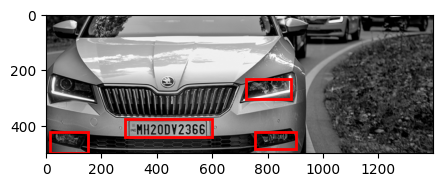

[[286.47345  374.7244   600.53174  440.6087  ]
 [754.1861   421.13837  902.95374  482.40482 ]
 [ 12.359745 423.1536   150.19725  497.70334 ]
 [723.7441   231.48154  883.0882   302.8247  ]]


In [41]:
nms_prediction = apply_nms(prediction, iou_thresh=0.2)
print('NMS APPLIED MODEL OUTPUT')
tensor_array = nms_prediction['boxes'].cpu()
plot_img_bbox(torch_to_pil(tensor_image), tensor_array)
print(tensor_array.numpy())

(500, 1400, 3)
286.47345 374.7244 600.53174 440.6087
PyTesseract: \cMH20DV2366)|

[4o
754.1861 421.13837 902.95374 482.40482
PyTesseract: Ss *

platw not recognized
12.359745 423.1536 150.19725 497.70334
PyTesseract: SiR
q “= —

platw not recognized
723.7441 231.48154 883.0882 302.8247
PyTesseract: a
ao

platw not recognized


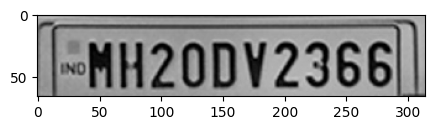

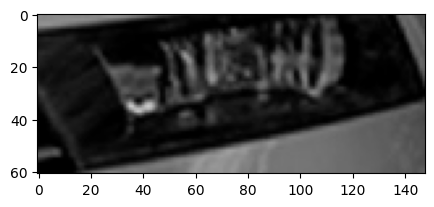

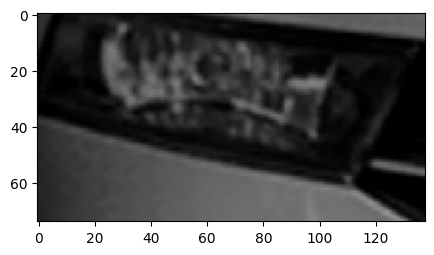

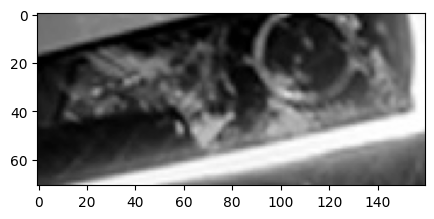

In [42]:
import pytesseract
import easyocr

smaple_image = cv2.imread(test)
numpy_image = tensor_image.cpu().numpy()

numpy_image = (numpy_image * 255).astype(np.uint8)

numpy_image = np.transpose(numpy_image, (1, 2, 0))

rgb_image = cv2.cvtColor(numpy_image, cv2.COLOR_BGR2RGB)
print(rgb_image.shape)
roi = tensor_array.numpy()
for i in roi:
    x, y, w, h = i
    print(x,y,w,h)
    plate = rgb_image[int(y):int(h), int(x):int(w)]
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(plate)
    reader = easyocr.Reader(['en'])  # English language
    result = reader.readtext(plate)
    text = pytesseract.image_to_string(plate, config='--psm 6')
    print('PyTesseract:',text)
    try: 
        print(result[0][1])
    except:
        print('platw not recognized')

In [43]:
print(result[0][1])

IndexError: list index out of range